In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#导入必要的库

In [26]:
#读取数据
df1=pd.read_csv('data.csv') 
df1=df1.iloc[:,2:]
df1.tail()

,open,low,close,high
26272,7.1042,7.1042,7.1048,7.1055
26273,7.1047,7.1038,7.1038,7.1047
26274,7.1039,7.1039,7.1046,7.1047
26275,7.1048,7.1043,7.1045,7.1049
26276,7.1049,7.1049,7.1057,7.1057


In [27]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(X.shape)
print(y.shape)

(26277, 3)
(26277,)


In [28]:
#构造训练集测试集 
y=pd.DataFrame(y.values,columns=['target'])
x=X
input_size=len(x.iloc[1,:])
cut=len(y)//10#取最后cut=10天为测试集
X_train, X_test=x.iloc[:-cut],x.iloc[-cut:]#列表的切片操作
y_train, y_test=y.iloc[:-cut],y.iloc[-cut:]
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
x.iloc[:-cut]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

70950
7881
23650
2627


In [29]:
#建立bp模型 训练 
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
model = Sequential()  #层次模型
model.add(Dense(16,input_dim=input_size,init='uniform')) #输入层，Dense表示BP层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(4,init='uniform')) #中间层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(1))  #输出层
model.compile(loss='mean_squared_error', optimizer='Adam') #编译模型
model.fit(X_train, y_train, nb_epoch = 50, batch_size = 256) #训练模型nb_epoch=50次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, input_dim=3, kernel_initializer="uniform")`
  
E:\anoconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="uniform")`
  
E:\anoconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/50
23650/23650 [==============================] - 0s 15us/step - loss: 0.2026
Epoch 2/50
23650/23650 [==============================] - 0s 6us/step - loss: 0.0248
Epoch 3/50
23650/23650 [==============================] - 0s 7us/step - loss: 0.0127
Epoch 4/50
23650/23650 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 5/50
23650/23650 [==============================] - 0s 7us/step - loss: 0.0048
Epoch 6/50
23650/23650 [==============================] - 0s 6us/step - loss: 0.0023
Epoch 7/50
23650/23650 [==============================] - 0s 5us/step - loss: 8.6696e-04
Epoch 8/50
23650/23650 [==============================] - 0s 6us/step - loss: 2.7231e-04
Epoch 9/50
23650/23650 [==============================] - 0s 5us/step - loss: 8.1726e-05
Epoch 10/50
23650/23650 [==============================] - 0s 7us/step - loss: 3.1396e-05
Epoch 11/50
23650/23650 [==============================] - 0s 6us/step - loss: 2.0191e-05
Epoch 12/50
23650/23650 [=================

In [30]:
model.summary()#模型描述

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                64        
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [31]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
y_train=y_train

Text(0.5, 1.0, 'Train Data')

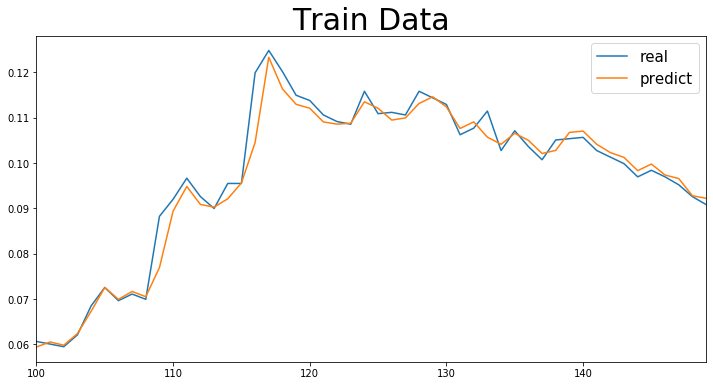

In [32]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [33]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

Text(0.5, 1.0, 'Test Data')

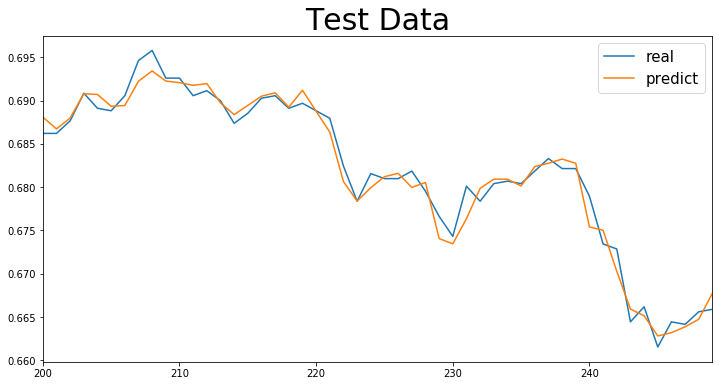

In [34]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [35]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train[:,0]) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test[:,0]) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)
print('训练时间（秒）:',15.25)

训练集上的MAE/MSE/MAPE
0.0015122720594528372
6.715321538274574e-06
0.595540765012317
测试集上的MAE/MSE/MAPE
0.001278273879630919
2.6149447835062204e-06
0.17901381364811333
预测涨跌正确: 0.8175932977913176
训练时间（秒）: 15.25
